In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('carprices.csv')
data

,Mileage,Age(yrs),Sell Price($)
0,69000,6,18000
1,35000,3,34000
2,57000,5,26100
3,22500,2,40000
4,46000,4,31500
5,59000,5,26750
6,52000,5,32000
7,72000,6,19300
8,91000,8,12000
9,67000,6,22000


In [3]:
data.shape

(20, 3)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Mileage        20 non-null     int64
 1   Age(yrs)       20 non-null     int64
 2   Sell Price($)  20 non-null     int64
dtypes: int64(3)
memory usage: 608.0 bytes


In [5]:
data.rename(columns={'Age(yrs)':'Age_yrs', 'Sell Price($)':'Sell_Price'}, inplace=True)

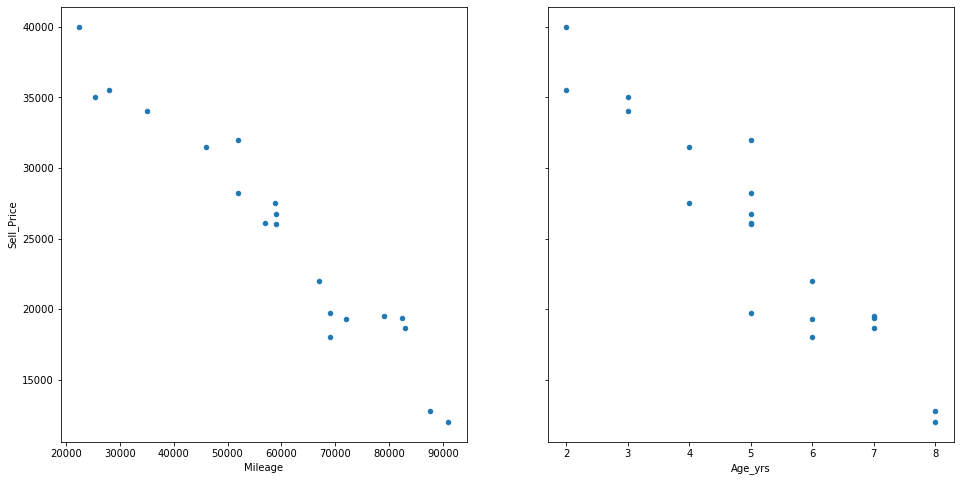

In [6]:
%matplotlib inline
fig, axs = plt.subplots(1,2, sharey=True)
data.plot(kind='scatter',x='Mileage', y='Sell_Price', ax=axs[0], figsize=(16,8))
data.plot(kind='scatter',x='Age_yrs', y='Sell_Price', ax=axs[1])

In [7]:
feature_colm = ['Mileage','Age_yrs']
x = data[feature_colm]
y = data['Sell_Price']

In [8]:
model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [9]:
print(model.intercept_)
print(model.coef_)

47223.349105076486
[-3.38301880e-01 -3.52792012e+02]


In [10]:
model.predict([[69000,6]])

array([21763.76732618])

In [11]:
model.score(x,y)

0.9358277461816622

In [12]:
x_new = pd.DataFrame({})

In [13]:
x = data.drop('Sell_Price', axis=1)
x.head()

,Mileage,Age_yrs
0,69000,6
1,35000,3
2,57000,5
3,22500,2
4,46000,4


In [14]:
y = data['Sell_Price']

In [15]:
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     26750
6     32000
7     19300
8     12000
9     22000
10    18700
11    19500
12    26000
13    27500
14    19400
15    35000
16    35500
17    19700
18    12800
19    28200
Name: Sell_Price, dtype: int64

In [16]:
import statsmodels.formula.api as smf
statmodel = smf.ols(formula="Sell_Price ~ Mileage + Age_yrs", data=data).fit()

In [17]:
statmodel.conf_int()

,0,1
Intercept,44100.419625,50346.278585
Mileage,-0.535675,-0.140928
Age_yrs,-2629.878359,1924.294335


In [18]:
statmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sell_Price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     124.0
Date:                Sat, 04 Jul 2020   Prob (F-statistic):           7.29e-11
Time:                        16:27:59   Log-Likelihood:                -179.73
No. Observations:                  20   AIC:                             365.5
Df Residuals:                      17   BIC:                             368.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.722e+04   1480.191     31.904      0.000    4.41e+04    5.03e+04
Mileage       -0.3383      0.094     -3.616      0.002      -0.536      -0.141
Age_yrs     -352.7920   1079.282     -0.327      0.748   -2629.878    1924.294
==============================================================================
Omnibus:                        0.060   Durbin-Watson:                   1.296
Prob(Omnibus):                  0.971   Jarque-Bera (JB):                0.284
Skew:                           0.032   Prob(JB):                        0.868
Kurtosis:                       2.420   Cond. No.                     2.00e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
statmodel = smf.ols(formula="Sell_Price ~ Mileage", data=data).fit()

In [20]:
statmodel.rsquared

0.9354244112393255

In [21]:
statmodel = smf.ols(formula="Sell_Price ~ Age_yrs", data=data).fit()
statmodel.rsquared

0.8864627777834573

In [25]:
import pickle
filename = 'model.pickle'
pickle.dump(model, open(filename, 'wb'))

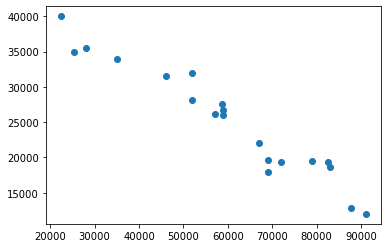

In [26]:
plt.scatter(data.Mileage,data.Sell_Price)

In [24]:
round(125.021425,ndigits=2)

125.02